# CMU Portugal - Project 3 - Wine Quality <h3>December 2024</h3>

# Problem Statement

The goal of this analysis is to determine the quality of wine given a set of physicochemical input variables.

# Dataset - Wine Quality

The dataset is related to white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  These datasets can be viewed as classification or regression tasks.  

Per the authors of the dataset:  "The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods."

<table>
    <tr>
        <td>Dataset Characteristics: Multivariate</td>
        <td>Subject Area: Business </td>
    </tr>
    <tr>
        <td>Associated Tasks: Classification, Regression</td>
        <td>Feature Type: Real</td>
    </tr>
    <tr>
        <td>Instance Count: 4898</td>
        <td>Feature Count: 11</td>
    </tr>
</table>

Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol

Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

(<a href = "https://archive.ics.uci.edu/dataset/186/wine+quality">Link to data source</a>)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns     

# Load and Preview Data

In [2]:
dataset_path = "dataset/winequality-white.csv"
df = pd.read_csv(dataset_path, delimiter=';')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

# Find and address null values

In [3]:
# Find nulls
# Nothing to address in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Look for Outliers

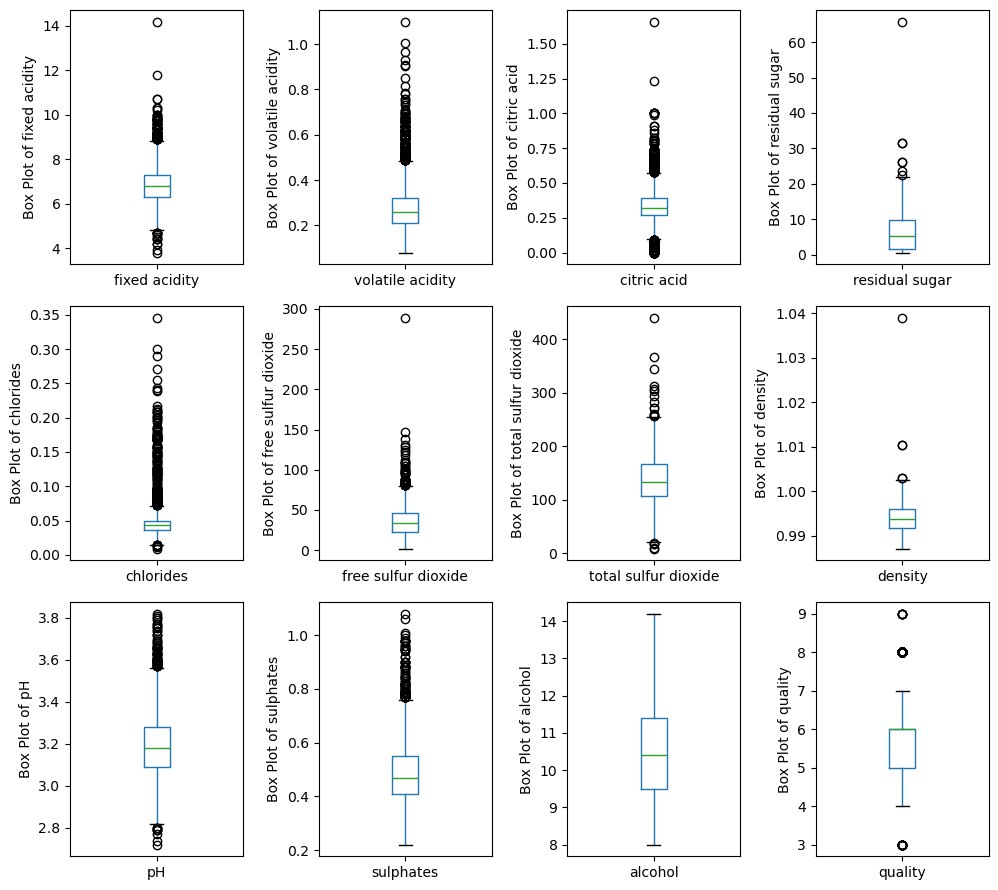

In [4]:
# Box plot to graphically show outlier analysis

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 9))

for x in range(len(df.columns.values)):
    plt.subplot(3,4,x+1) #attempting to print output in grid
    df.boxplot(column=df.columns.values[x], grid=False)
    plt.ylabel("Box Plot of " + df.columns.values[x])
    
plt.tight_layout()
plt.show()    

Analysis of Box Plots:
- Residual sugar, Free sulfur dioxide, and density have the most noticable outliers

Next Steps:
- Remove outliers using appropriate method depending on normality of the data.  Use distrubutions below to determine normality

<h3> Remove outliers for residual sugar

In [5]:
# Remove outliers for residual sugar using IQR method, since distribution (shown below) is clearly not normal

# Calculate the IQR
Q1 = df['residual sugar'].quantile(0.25)  # First quartile
Q3 = df['residual sugar'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['residual sugar'] >= lower_bound) & (df['residual sugar'] <= upper_bound)]

<h3> Remove outliers for free sulfur dioxide

In [6]:
# It's not clear that free sulfur dioxide and density are normal, so 1st test for normality

skewness = df['free sulfur dioxide'].skew()
kurtosis = df['free sulfur dioxide'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

if abs(skewness) < 0.5 and abs(kurtosis - 3) < 1:
    print("Data is approximately normally distributed.")
else:
    print("Data is not normally distributed.")
    
# Free sulfur dioxide is not normal, so remove using IQR method

# Calculate the IQR
Q1 = df['free sulfur dioxide'].quantile(0.25)  # First quartile
Q3 = df['free sulfur dioxide'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['free sulfur dioxide'] >= lower_bound) & (df['free sulfur dioxide'] <= upper_bound)]


Skewness: 1.408455475579785
Kurtosis: 11.48054947636213
Data is not normally distributed.


<h3> Remove outliers for density

In [7]:
# It's not clear that free sulfur dioxide and density are normal, so 1st test for normality

skewness = df['density'].skew()
kurtosis = df['density'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

if abs(skewness) < 0.5 and abs(kurtosis - 3) < 1:
    print("Data is approximately normally distributed.")
else:
    print("Data is not normally distributed.")

# Density is not normal, so remove using IQR method

# Calculate the IQR
Q1 = df['density'].quantile(0.25)  # First quartile
Q3 = df['density'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['density'] >= lower_bound) & (df['density'] <= upper_bound)]

Skewness: 0.24598164034869952
Kurtosis: -0.7670667702356857
Data is not normally distributed.


<h3> NOTE:  When have time, turn redundant code into funtions (i.e. removing outliers using IQR and testing for normality)

# Evaluate Distributions

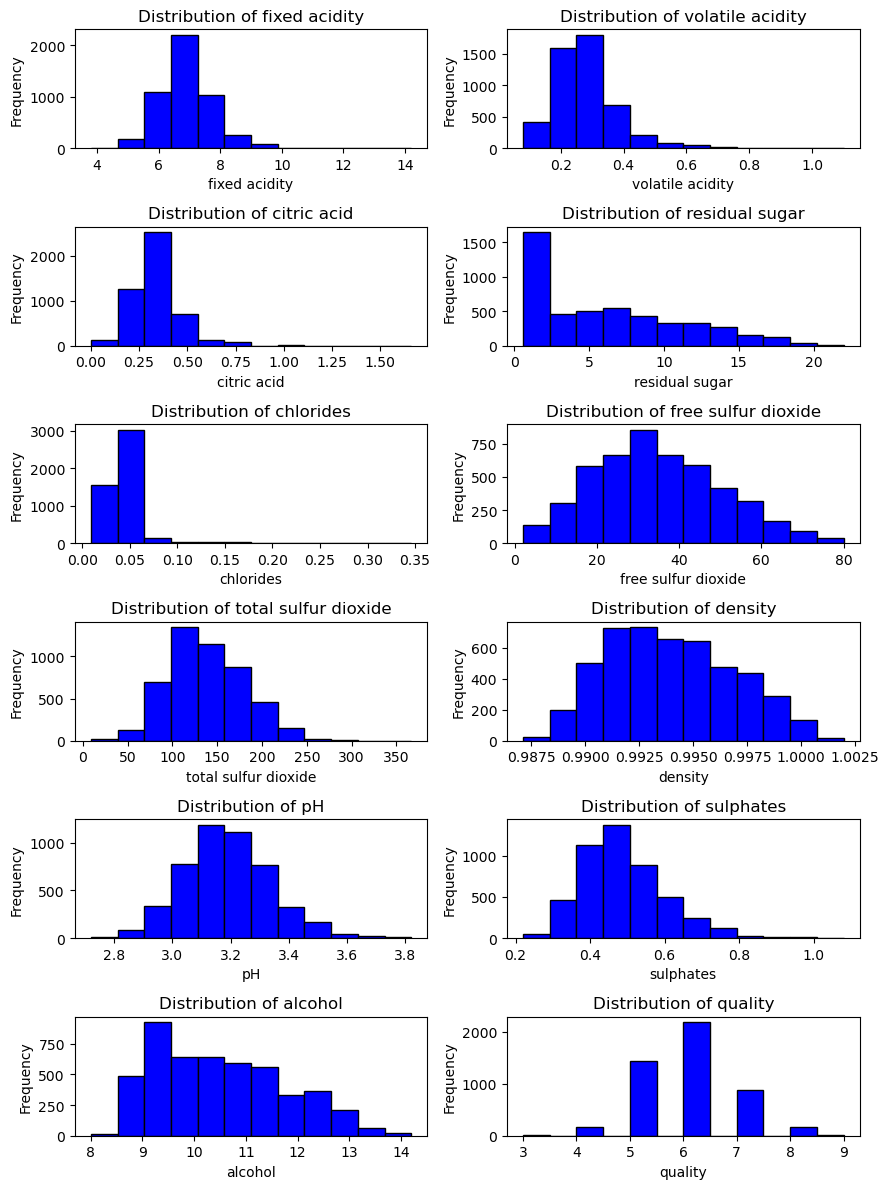

In [8]:
# Graph and evaluate histograms

plt.figure(figsize=(9, 12))

for x in range(len(df.columns.values)):
    #plt.figure(figsize=(4, 2))
    plt.subplot(6,2,x+1) #attempting to print output in grid
    df[df.columns.values[x]].plot(kind='hist', bins=12, color='blue', edgecolor='black')
    plt.title("Distribution of "+ df.columns.values[x])
    plt.xlabel(df.columns.values[x])
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()        


Analysis of histograms:
- A number of input variables are skewed, which may violate the assumptions of normality that underlie linear regression.  Because of this we should apply transformations to the skewed variables to improve regression results

- Our attributes have very different scales (e.g. 0.2-1.0 vs 0-400).  Because of this, we will want to do feature scaling to increase model accuracy and improve speed of convergence for optimization algorithms like gradient descent.

- The "Distribution of quality" histogram clearly shows that the classes are not balanced (i.e. there are not the same number of high quality wines as there are low qualtiy wines in the dataset).  Therefore, we must use "stratify = y" when we do the train/test split.

# Descriptive Statistics

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.026832     0.289996   
volatile acidity          -0.026832          1.000000    -0.155396   
citric acid                0.289996         -0.155396     1.000000   
residual sugar             0.084037          0.045408     0.089521   
chlorides                  0.022866          0.068880     0.112709   
free sulfur dioxide       -0.042525         -0.098717     0.122471   
total sulfur dioxide       0.094575          0.089224     0.128616   
density                    0.267469          0.001485     0.147605   
pH                        -0.425700         -0.032251    -0.164719   
sulphates                 -0.011380         -0.033725     0.059532   
alcohol                   -0.121488          0.069276    -0.078552   
quality                   -0.112119         -0.194063    -0.012609   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

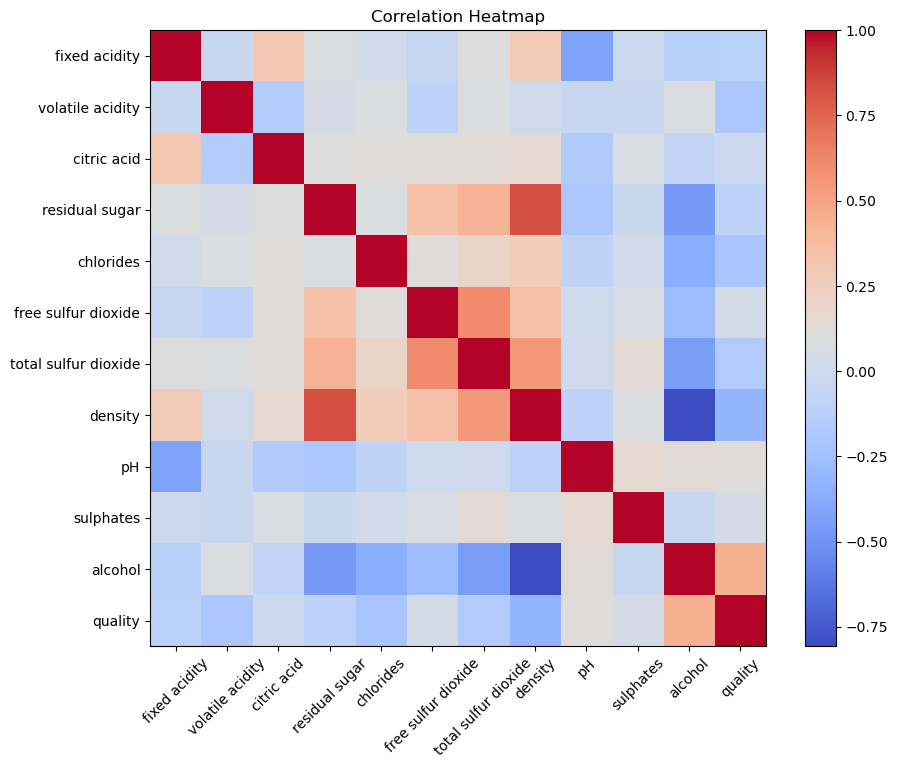

In [9]:
# Calculate coorelation between numeric variables 

plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
print(correlation)

plt.imshow(correlation, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Heatmap")
plt.show()

Analysis of correlation heatmap:
- Total Sulfur Dioxide and Free Sulfur dioxide are correlated (0.62)
- Density and residual sugar are highly positively coorelated (0.84)
- Density and Total sulfur dioxide are coorelated (0.53)
- pH and Fixed acidity are negatively coorelated (-0.43)
- Alcohol and residual sugar are negatively coorelated (-0.45)
- Alcohol and total sulfur dioxide are negatively coorelated (-0.45)
- Alcohol and density are highly negatively coorelated (-0.78)

Next steps: 
- Consider priciple component analysis to determine which variables to keep
- 1st review pair plot to confirm

<Figure size 1200x1200 with 0 Axes>

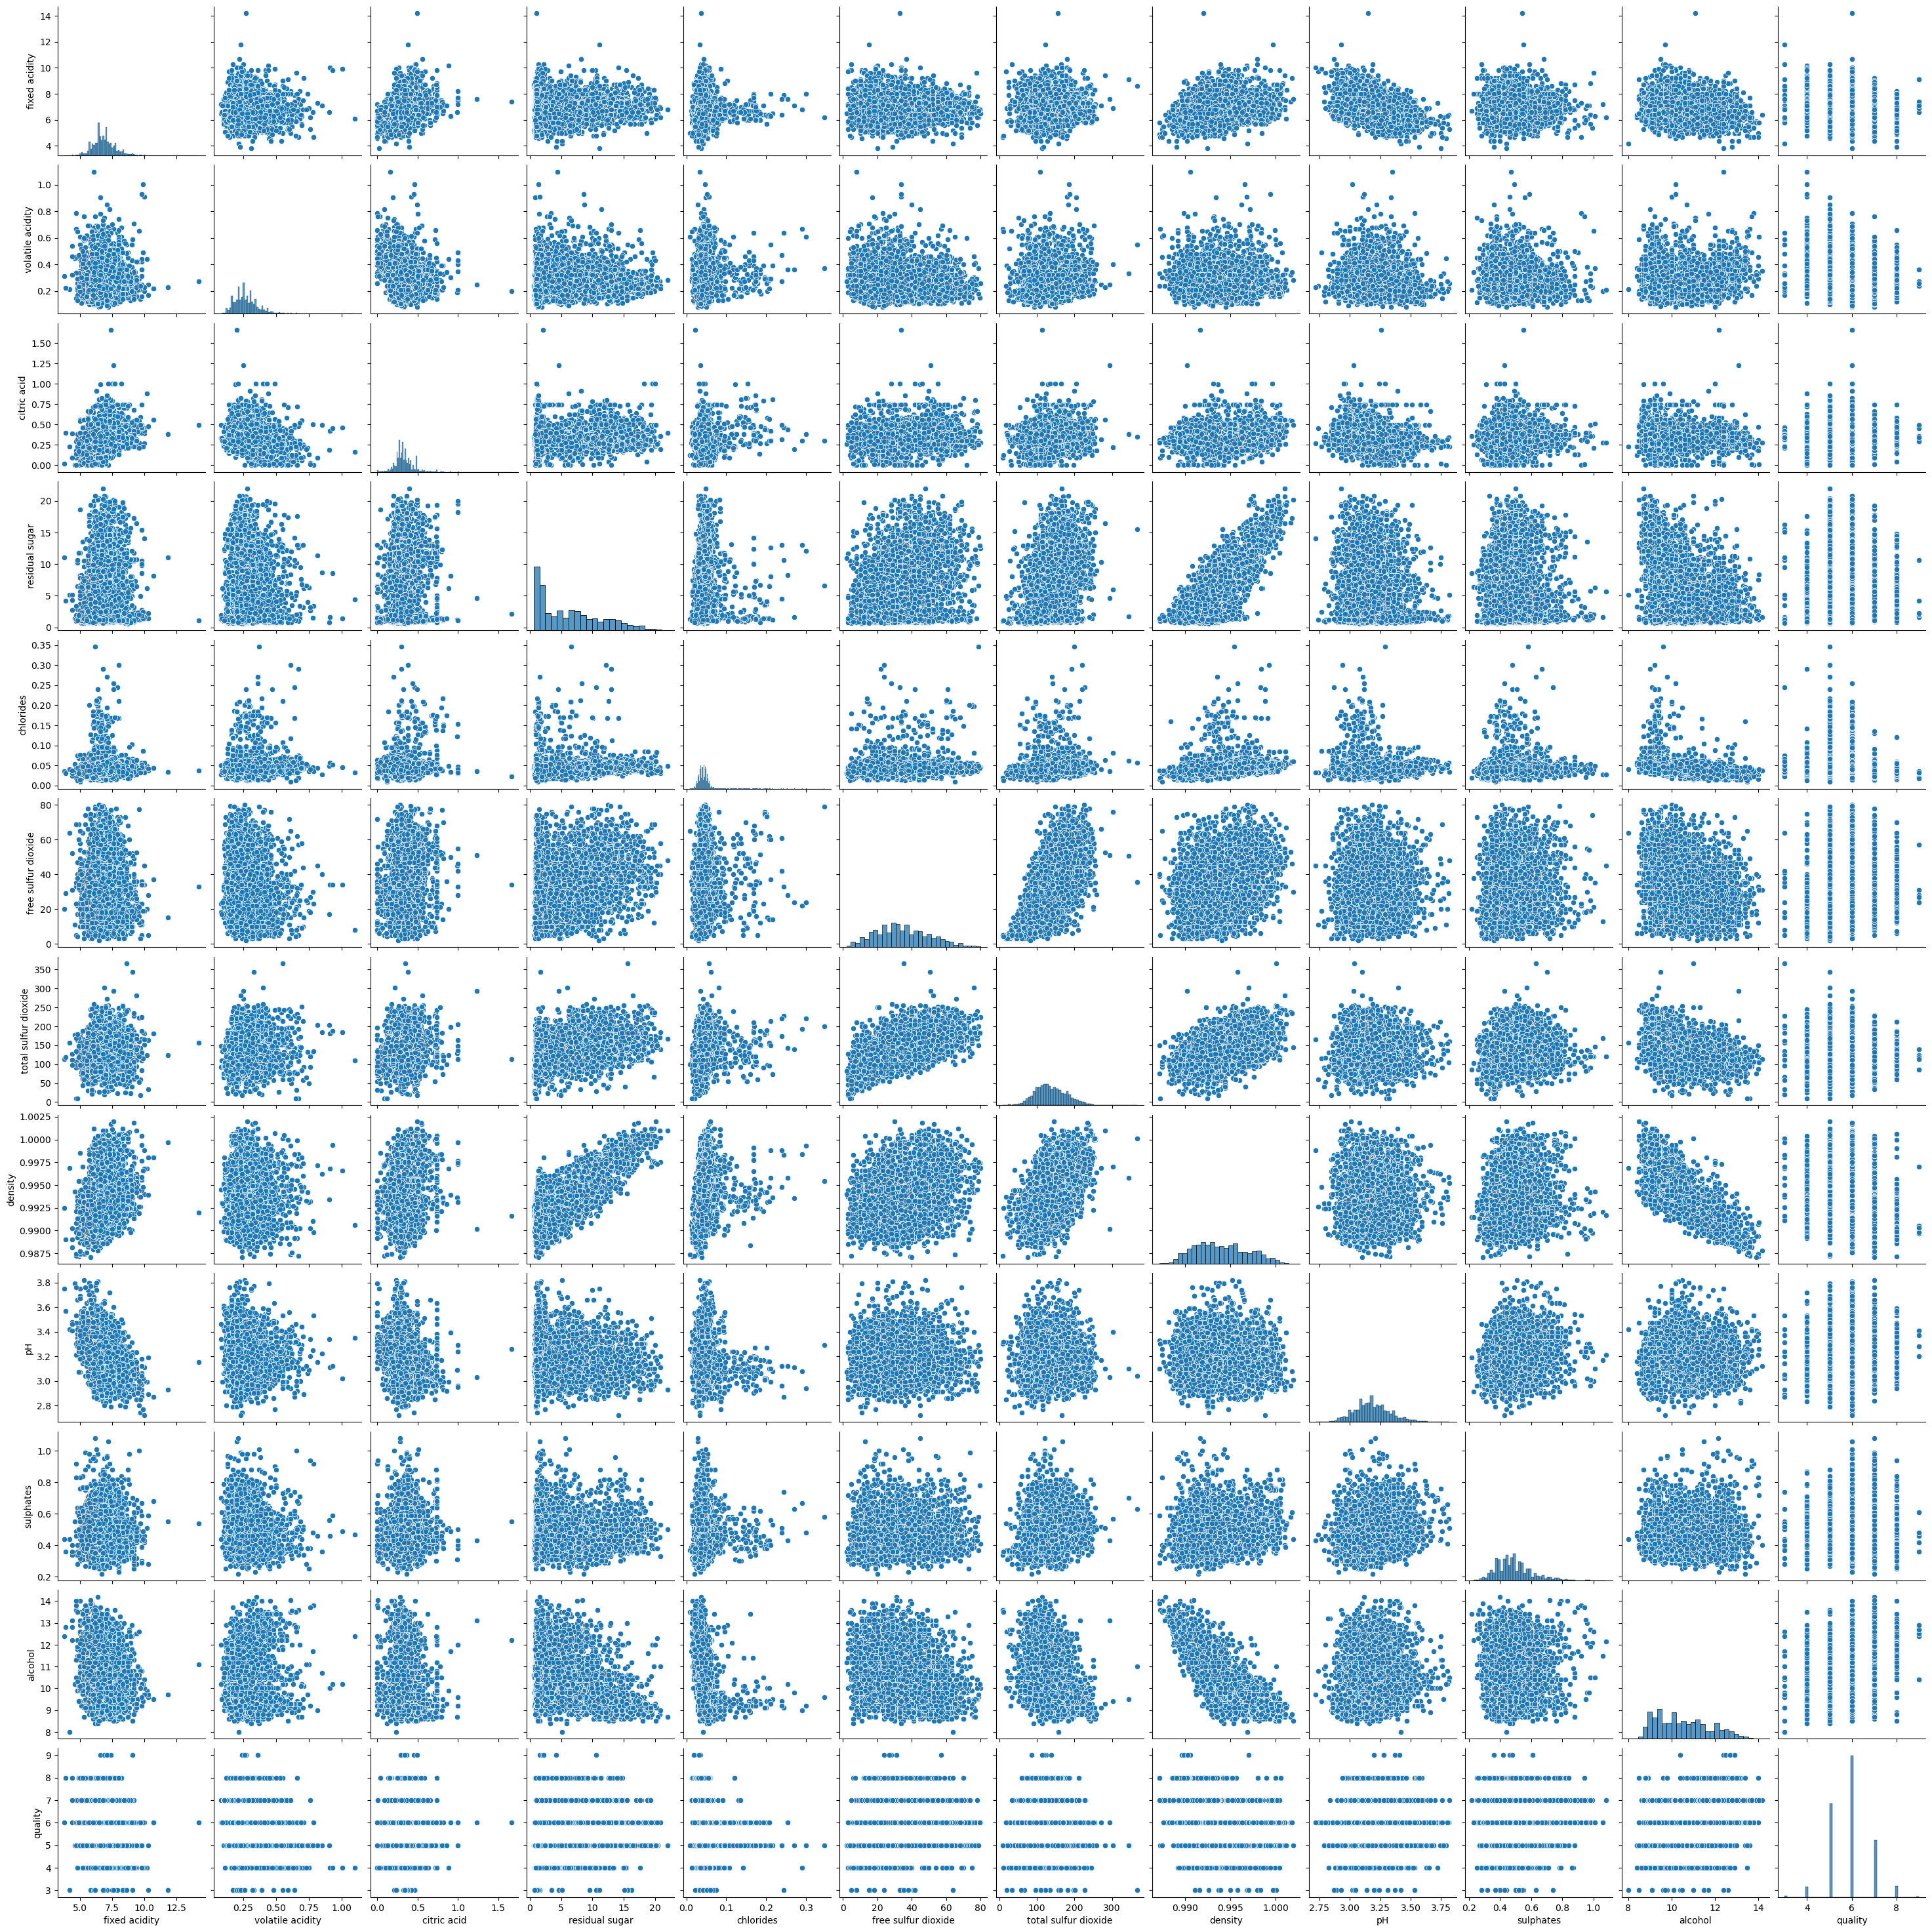

In [10]:
# Create pairplot to visualize relationship between all variables 

plt.figure(figsize=(12, 12))
sns.pairplot(df)

Analysis of PairPlot:
- Visual inspection of pairplot confirms results of correlation heatmap analysis

Next:
- Use PCA to determine features to keep

# Principle Component Analysis

Explained Variance Ratio per Component: [0.28355047 0.131181   0.11553389 0.09083924 0.08131322 0.07761927
 0.06181374 0.05804993 0.04666046 0.0280791 ]
Number of components selected: 10


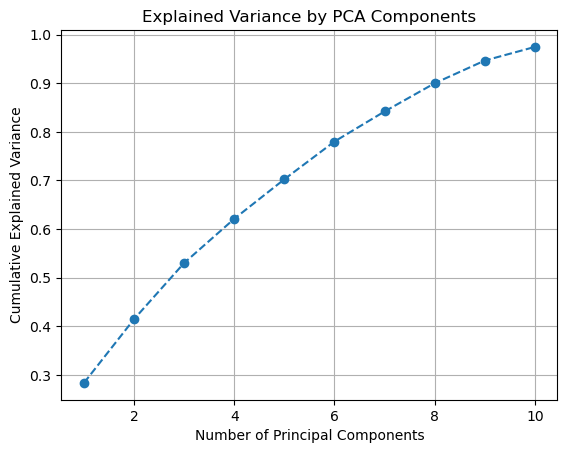

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.662760 -0.254981 -0.393391 -1.718070 -0.338463 -0.850387  0.874230   
1 -0.645387  0.278210  0.882129  0.854051 -0.556459 -0.325970 -0.073075   
2  0.155046 -1.137064 -0.166165  0.198306 -0.341725 -0.394269 -0.137090   
3  1.456651  0.238791 -0.370249 -0.480497 -0.454466  0.753320 -0.056373   
4  1.456651  0.238791 -0.370249 -0.480497 -0.454466  0.753320 -0.056373   

        PC8       PC9      PC10  
0  0.726126 -0.538669  0.021463  
1  0.550236  0.366054 -1.268831  
2  0.640926  1.141416  0.449857  
3 -0.376721  0.708724 -0.052377  
4 -0.376721  0.708724 -0.052377  


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Step 0: Make dataframe with only the input variables.  PCA should only be performed on the inputs vars
input_df = df.iloc[:, :-1] 

# Step 1: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_df)

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain components that explain 95% of the variance
reduced_data = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])

# Step 4: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio per Component:", explained_variance)
print(f"Number of components selected: {pca.n_components_}")

# Step 5: Visualize cumulative explained variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

# Step 6: Display reduced data
print(reduced_df.head())


# Prepare Data for Classification

In [11]:
# df[df['quality'] >8] # Count of high quality wines (>8)

# Define bins and labels
bins = [0, 6, 8, 10]  # Bin edges
labels = ['Low', 'Medium', 'High']  # Corresponding labels

# Use pd.cut to categorize
df['quality-cat'] = pd.cut(df['quality'], bins=bins, labels=labels, right=False)

# Split Dataset into Test and Train sections

In [12]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.iloc[:, :-1]  # Independent variables =  all columns except last one
y = df['quality']                  # Dependent variable

# Split the data (80% training, 20% testing)
# We're setting stratify to yes so that both the training and test sets have similar proportions of classes in the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the split data
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)


X_train:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4525            5.8             0.130         0.22            12.7      0.058   
768             6.7             0.110         0.34             8.8      0.043   
1170            7.7             0.250         0.43             4.5      0.062   
432             7.4             0.155         0.34             2.3      0.045   
4451            6.3             0.300         0.19             7.7      0.049   
...             ...               ...          ...             ...        ...   
2050           11.8             0.230         0.38            11.1      0.034   
2844            8.0             0.220         0.31             5.6      0.049   
46              6.2             0.450         0.26             4.4      0.063   
167             6.7             0.460         0.18             2.4      0.034   
4646            5.9             0.180         0.28             1.0      0.037   

      free sulfur

# Data Transformations and Encoding

In [13]:
NEXT - Hands on Machine Learning page 49

SyntaxError: invalid syntax (3429632706.py, line 1)

# Feature Scaling

# Feature Selection

In [ ]:
# Perform feature selection ONLY on the TRAIN DATASET

# Validation

# Run final test on test data

# Other Tests to Consider

In [ ]:
'''
Other Tests to Consider:

Logistic regression
Classification
Remove fake data and redo

Copy this file to do other tests
'''

'\nOther Tests to Consider:\n\nLogistic regression\nClassification\nRemove fake data and redo\n\nCopy this file to do other tests\n'